Resultados da Clusterização:
Cluster
6    829
5    722
2    650
8    603
4    560
3    555
1    519
7    479
9    289
0    250
Name: count, dtype: int64


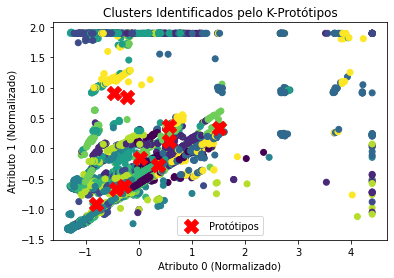

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
url = "sensor_readings_24.data"
data = pd.read_csv(url, header=None)

# Normalizar os dados
normalized_data = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()

# Definir um valor para K (n_clusters) e atribuir valores iniciais aos protótipos
K = 3
prototypes = normalized_data.sample(n=K, random_state=42)

# Inicializar variáveis para o loop
max_iterations = 100
convergence_threshold = 1e-4
iteration = 0

while iteration < max_iterations:
    # Passo 3: Determinar a partição Vi(k)
    distances = np.linalg.norm(normalized_data.values[:, np.newaxis] - prototypes.values, axis=2)
    clusters = np.argmin(distances, axis=1)

    # Passo 4: Atualizar os protótipos
    new_prototypes = np.array([normalized_data[clusters == i].mean(axis=0) for i in range(K)])

    # Verificar convergência
    if np.linalg.norm(new_prototypes - prototypes.values) < convergence_threshold:
        break

    # Atualizar protótipos para a próxima iteração
    prototypes = pd.DataFrame(new_prototypes, columns=normalized_data.columns)

    # Incrementar a iteração
    iteration += 1

# Adicionar rótulos dos clusters ao DataFrame original
data['Cluster'] = clusters

# Exibir os resultados da clusterização
print("Resultados da Clusterização:")
print(data['Cluster'].value_counts())

# Visualizar os clusters e protótipos
plt.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(prototypes.iloc[:, 0], prototypes.iloc[:, 1], s=200, marker='X', c='red', label='Protótipos')
plt.title("Clusters Identificados pelo K-Protótipos")
plt.xlabel("Atributo 0 (Normalizado)")
plt.ylabel("Atributo 1 (Normalizado)")
plt.legend()
plt.show()
